# Obtaining Data + Scrubbing Data

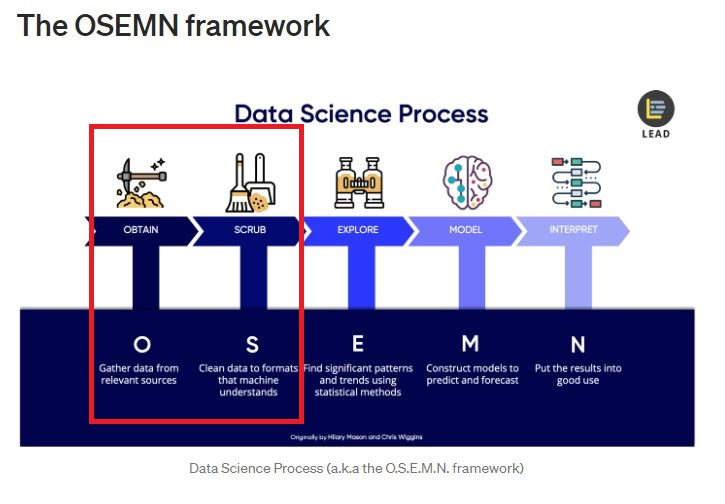

__Source__: https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492

#### Website: https://www.kaggle.com/blastchar/telco-customer-churn
#### File: WA_Fn-UseC_-Telco-Customer-Churn.csv

## Library Imports

In [43]:
import pandas as pd

## Creating Pandas Dataframe using .read_csv method

In [44]:
df_churndata = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churndata.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### Info about the dataframe
#### We see 3 types of data: float64, int64, object

In [45]:
df_churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Checking for nulls/NaNs
### We see from below that there are no null values or NaNs. The data was cleaned beforehand.

In [46]:
# Using .isna()
df_churndata.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
# We have empty series using .isnull()
df_churndata.isnull().any()[lambda x: x]

Series([], dtype: bool)

In [48]:
df_churndata.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

## Changes to the dataframe
#### 1) CHURN --> 0/1 Values
#### 2) Dummy values for redundant "no internet service', then they can be turned to binary columns --> 0/1 Values
        MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
        StreamingTV, StreamingMovies
#### 3) Don't want 2 indexes so I dropped 'Unnamed' column
#### 4) Binary columns --> 0/1 
        gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling
#### 5) Scaling data in columns - I've decided to scale this in exploration phase with train/test split where i can call minmax scalar
        tenure, MonthlyCharges, TotalCharges

In [49]:
# 1) and 4) Change binary categorical values to 0/1

binary_list = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# for column in binary_list:
#     df_churndata[column] = df_churndata[column].map({'Yes': 1, 'No':0})


df_churndata['Churn'] = df_churndata['Churn'].map({'Yes': 1, 'No':0})
df_churndata['gender'] = df_churndata['gender'].map({'Female': 0, 'Male':1})
df_churndata['Partner'] = df_churndata['Partner'].map({'Yes': 1, 'No':0})
df_churndata['Dependents'] = df_churndata['Dependents'].map({'Yes': 1, 'No':0})
df_churndata['PhoneService'] = df_churndata['PhoneService'].map({'Yes': 1, 'No':0})
df_churndata['PaperlessBilling'] = df_churndata['PaperlessBilling'].map({'Yes': 1, 'No':0})

df_churndata.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                1           Electronic check          29.85         29.85   
1                0               Mailed check          56.95        1889.5   
2                1               Mailed check          53.85        108.15   
3                0  Bank transfer (automatic)          42.30       1840.75   
4                1           Electronic check          70.70        151.65   

  Churn  
0     0  
1     0  
2     1  
3     0  
4     1  

[5 rows x 21 columns]

In [50]:
# 2) Dummy values for redundant "no internet service', then they can be turned to binary columns

### Changing "No Phone Service" to "No"
### InternetService im changing to simple yes/no

df_churndata['MultipleLines']    = df_churndata['MultipleLines'].replace(['No phone service'], 'No')
df_churndata['InternetService']  = df_churndata['InternetService'].replace(['No phone service'], 'No')
df_churndata['InternetService']  = df_churndata['InternetService'].replace(['DSL'], 'Yes')
df_churndata['InternetService']  = df_churndata['InternetService'].replace(['Fiber optic'], 'Yes')
df_churndata['OnlineSecurity']   = df_churndata['OnlineSecurity'].replace(['No phone service'], 'No')
df_churndata['OnlineBackup']     = df_churndata['OnlineBackup'].replace(['No phone service'], 'No')
df_churndata['DeviceProtection'] = df_churndata['DeviceProtection'].replace(['No phone service'], 'No')
df_churndata['TechSupport']      = df_churndata['TechSupport'].replace(['No phone service'], 'No')
df_churndata['StreamingTV']      = df_churndata['StreamingTV'].replace(['No phone service'], 'No')
df_churndata['StreamingMovies']  = df_churndata['StreamingMovies'].replace(['No phone service'], 'No')


### Converting them to binary values
df_churndata['MultipleLines']    = df_churndata['MultipleLines'].map({'Yes': 1, 'No':0})
df_churndata['InternetService']  = df_churndata['InternetService'].map({'Yes': 1, 'No':0})
df_churndata['OnlineSecurity']   = df_churndata['OnlineSecurity'].map({'Yes': 1, 'No':0})
df_churndata['OnlineBackup']     = df_churndata['OnlineBackup'].map({'Yes': 1, 'No':0})
df_churndata['DeviceProtection'] = df_churndata['DeviceProtection'].map({'Yes': 1, 'No':0})
df_churndata['TechSupport']      = df_churndata['TechSupport'].map({'Yes': 1, 'No':0})
df_churndata['StreamingTV']      = df_churndata['StreamingTV'].map({'Yes': 1, 'No':0})
df_churndata['StreamingMovies']  = df_churndata['StreamingMovies'].map({'Yes': 1, 'No':0})


# df['first_set'] = df['first_set'].replace(['Blue'],'Green')
df_churndata.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                1             0.0  ...   
1             1              0                1             1.0  ...   
2             1              0                1             1.0  ...   
3             0              0                1             1.0  ...   
4             1              0                1             0.0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0               0.0          0.0          0.0              0.0   
1               1.0          0.0          0.0              0.0   
2               0.0          0.0          0.0              0.0   
3               1.0          1.0          0.0              0.0   
4               0.0          0.0          0.0              0.0   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0  Month-to-month                1           Electronic check          29.85   
1        One year                0               Mailed check          56.95   
2  Month-to-month                1               Mailed check          53.85   
3        One year                0  Bank transfer (automatic)          42.30   
4  Month-to-month                1           Electronic check          70.70   

   TotalCharges Churn  
0         29.85     0  
1        1889.5     0  
2        108.15     1  
3       1840.75     0  
4        151.65     1  

[5 rows x 21 columns]

#### I want to normalize the following: 1) Tenure  2) Monthly Charges 3) Total Charges

##### However, I want to check to see if the data is following any distribution.

In [51]:
# import matplotlib.pyplot as plt
# import scipy.stats
# import numpy as np
# %matplotlib inline

# fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(15,20))

# ax1 = new_figure.add_subplot(131)
# ax2 = new_figure.add_subplot(231)
# ax3 = new_figure.add_subplot(331)

# ax1 = df_churndata.tenure.hist(bins=50)
# ax2 = df_churndata.MonthlyCharges.hist(bins=50)

<AxesSubplot:>

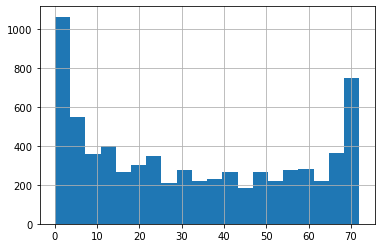

In [52]:
#graph 1 
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
%matplotlib inline

df_churndata.tenure.hist(bins=20)


<AxesSubplot:>

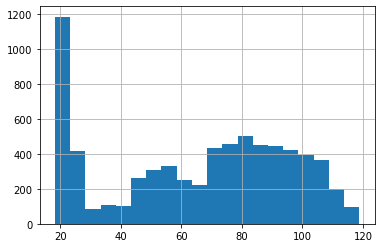

In [53]:
#graph 2

df_churndata.MonthlyCharges.hist(bins=20)

In [54]:
# I kept getting errors when trying to turn the column "TotalCharges" from non-null object to float
# I figured that the issue is because of row 488 per the errors. 
# Value for TotalCharges is blank for row 488
# I also considered using either mean, median, or mode
# But that was out the window because I have to make it float first and then I can run the methods for mean/median/mode

In [63]:

# df_churndata.replace('', np.nan, inplace=True)
# df_churndata['TotalCharges'].isnull().sum()
type(df_churndata['TotalCharges']

pandas.core.series.Series

In [56]:
# df_churndata1 = df_churndata.drop([df_churndata.index[488]])
# df_churndata1.reset_index()

In [57]:
pd.set_option("max_rows", None)
df_churndata1

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
5     9305-CDSKC       0              0        0           0       8   
6     1452-KIOVK       1              0        0           1      22   
7     6713-OKOMC       0              0        0           0      10   
8     7892-POOKP       0              0        1           0      28   
9     6388-TABGU       1              0        0           1      62   
10    9763-GRSKD       1              0        1           1      13   
11    7469-LKBCI       1              0        0           0      16   
12    8091-TTVAX       1              0        1           0      58   
13    0280-XJGEX       1              0        0           0      49   
14    5129-JLPIS       1              0        0           0      25   
15    3655-SNQYZ       0              0        1           1      69   
16    8191-XWSZG       0              0        0           0      52   
17    9959-WOFKT       1              0        0           1      71   
18    4190-MFLUW       0              0        1           1      10   
19    4183-MYFRB       0              0        0           0      21   
20    8779-QRDMV       1              1        0           0       1   
21    1680-VDCWW       1              0        1           0      12   
22    1066-JKSGK       1              0        0           0       1   
23    3638-WEABW       0              0        1           0      58   
24    6322-HRPFA       1              0        1           1      49   
25    6865-JZNKO       0              0        0           0      30   
26    6467-CHFZW       1              0        1           1      47   
27    8665-UTDHZ       1              0        1           1       1   
28    5248-YGIJN       1              0        1           0      72   
29    8773-HHUOZ       0              0        0           1      17   
30    3841-NFECX       0              1        1           0      71   
31    4929-XIHVW       1              1        1           0       2   
32    6827-IEAUQ       0              0        1           1      27   
33    7310-EGVHZ       1              0        0           0       1   
34    3413-BMNZE       1              1        0           0       1   
35    6234-RAAPL       0              0        1           1      72   
36    6047-YHPVI       1              0        0           0       5   
37    6572-ADKRS       0              0        0           0      46   
38    5380-WJKOV       1              0        0           0      34   
39    8168-UQWWF       0              0        0           0      11   
40    8865-TNMNX       1              0        1           1      10   
41    9489-DEDVP       0              0        1           1      70   
42    9867-JCZSP       0              0        1           1      17   
43    4671-VJLCL       0              0        0           0      63   
44    4080-IIARD       0              0        1           0      13   
45    3714-NTNFO       0              0        0           0      49   
46    5948-UJZLF       1              0        0           0       2   
47    7760-OYPDY       0              0        0           0       2   
48    7639-LIAYI       1              0        0           0      52   
49    2954-PIBKO       0              0        1           1      69   
50    8012-SOUDQ       0              1        0           0      43   
51    9420-LOJKX       0              0        0           0      15   
52    6575-SUVOI       0              1        1           0      25   
53    7495-OOKFY       0              1        1           0       8   
54    4667-QONEA       0              1       

In [58]:


# df['DataFrame Column'] = df['DataFrame Column'].astype(int)

# df_churndata1['TotalCharges'] = df_churndata1['TotalCharges'].astype(float)
# type(df_churndata['TotalCharges'])

pd.to_numeric(df_churndata1['TotalCharges'])
# pd.set_option("max_rows", None)
# df_churndata.dropna()



ValueError: Unable to parse string " " at position 752

In [ ]:
df_churndata.info()

In [ ]:
# df_churndata

In [ ]:
#graph 3
# First I am going to normalize the column df_churndata.TotalCharges
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(df_churndata.TotalCharges)




df_churndata.TotalCharges.head()

In [ ]:
#Saving to new .csv file
df_churndata.to_csv('TelcoCustomerChurn[MODIFIED].csv')

## So far so good. The data looks clean. There are no NaNs and isna() returned zeros. Will proceed to EDA.
    We will be using "TelcoCustomerChurn[MODIFIED].csv" moving forward